In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) =cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 898s 5us/step


(50000, 32, 32, 3)

In [10]:
x_train[0].shape
x_train[0].max()

255

In [11]:
x_train = x_train/255
x_test = x_test/255
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten


In [32]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)             

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)
model.fit(x_train,y_cat_train,epochs=15,
         validation_data = (x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6553 - accuracy: 0.3861 - val_loss: 1.5038 - val_accuracy: 0.4531
Epoch 2/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3182 - accuracy: 0.5201 - val_loss: 1.2469 - val_accuracy: 0.5534
Epoch 3/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1775 - accuracy: 0.5757 - val_loss: 1.1274 - val_accuracy: 0.5966
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0869 - accuracy: 0.6117 - val_loss: 1.1188 - val_accuracy: 0.6047
Epoch 5/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0201 - accuracy: 0.6403 - val_loss: 1.0522 - val_accuracy: 0.6274
Epoch 6/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9610 - accuracy: 0.6588 - val_loss: 1.0089 - val_accuracy: 0.6437
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9078 - accuracy: 0.6808 - val_loss: 1.0042 -

In [36]:
metrics = pd.DataFrame(model.history.history)
print(metrics)

        loss  accuracy  val_loss  val_accuracy
0   1.655298   0.38606  1.503779        0.4531
1   1.318177   0.52010  1.246862        0.5534
2   1.177494   0.57568  1.127408        0.5966
3   1.086869   0.61170  1.118783        0.6047
4   1.020129   0.64028  1.052153        0.6274
5   0.960968   0.65878  1.008876        0.6437
6   0.907760   0.68082  1.004249        0.6476
7   0.860605   0.69588  0.993961        0.6514
8   0.831491   0.70480  0.963696        0.6607
9   0.792177   0.72018  0.965108        0.6668
10  0.763780   0.72734  0.961556        0.6728
11  0.733605   0.74044  0.958561        0.6744
12  0.704981   0.75050  0.945294        0.6799
13  0.679587   0.75848  0.974747        0.6759
14  0.652088   0.76554  1.013021        0.6682


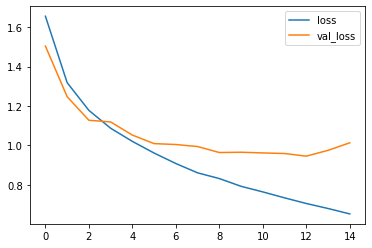

In [37]:
metrics[['loss','val_loss']].plot()

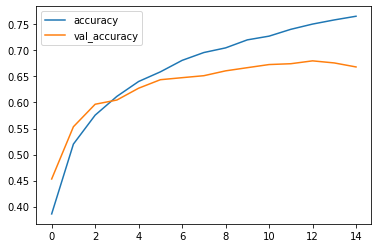

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0130 - accuracy: 0.6682


[1.0130212306976318, 0.6682000160217285]

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1000
           1       0.75      0.85      0.79      1000
           2       0.55      0.54      0.54      1000
           3       0.55      0.41      0.47      1000
           4       0.65      0.56      0.60      1000
           5       0.63      0.55      0.58      1000
           6       0.70      0.78      0.74      1000
           7       0.83      0.64      0.72      1000
           8       0.75      0.80      0.77      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.67     10000
   macro avg    

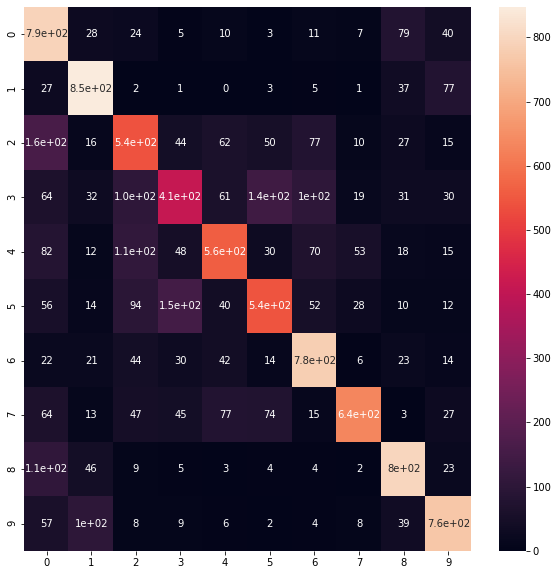

In [41]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [42]:
my_image = x_test[0]
my_image.shape

(32, 32, 3)

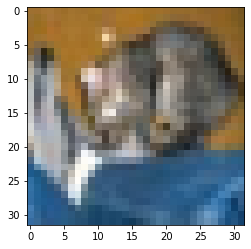

In [43]:
plt.imshow(my_image)

In [44]:
y_test[0]

array([3], dtype=uint8)

In [45]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)